Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 05 - Forced vibration in time domain

[1.   Introduction](#section_1)  
[2.   Impulse response](#section_2)  
[3.   General response to forced vibration](#section_3)  
[4.   Short transient loads](#section_4)  
[4.1. Impulse response approximation](#section_41)  
[4.2. Dynamic factor approach](#section_42)  
[5.   Assignment](#section_5)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

So far we have calculated the system response in damped free vibration, 
which depends solely on the initial conditions with $F(t) = 0$. 

<img src="images/singleDOF.png" alt="SDOF system" width="240px"/>

We call _forced vibration_ the system response to any force function, $F(t)$, 
which is the solution of the equation:

$$ m\ddot{u} + c\dot{u} + ku = F(t)$$

In this class we shall present the closed-form solution for any given force function,
starting with the very fundamental one: the _unit impulse function_.


## 2. Impulse response <a name="section_2"></a> 

We start by re-writing the equilibrium equation, which after division by the system mass is:

$$ \ddot{u} + 2\eta \dot{u} + \omega_{\rm n}^2 u = F(t)/m $$

Now we take the force function as $F(t) = m\delta(t)$ (the Dirac's delta function at time origin), 
then we apply Laplace transform on this equation disregarding the initial conditions 
($u_0 = 0$ and $v_0 = 0$). It gives:

$$ \mathscr{L}\left\{ \ddot{u} + 2 \eta \dot{u} + \omega_{\rm n}^2 u \right\} = 
   \mathscr{L}\left\{ \delta(t) \right\} $$
   
$$  s^2 \bar{u}(s) + 2 \eta s \bar{u}(s) + \omega_{\rm n}^2 \bar{u}(s) = 1 $$

what solving for $\bar{u}(s)$ results in:

$$ \bar{u}(s) =  
   \left[\frac{\omega_{\rm D}}{(s + \eta)^2 + \omega_{\rm D}^2}\right] 
   \left(\frac{1}{\omega_{\rm D}} \right) $$

where we have used the same definition we made for free damped vibration: 
$\omega_{\rm D}^2 = \omega_{\rm n}^2 - \eta^2$.

Recognizing the sine function transform and using the translation theorem gives
a special response called _unit impulse response_, $g(t)$:

$$ g(t) = \frac{1}{\omega_{\rm D}} \; e^{- \zeta \omega_{\rm n} t} 
          \sin \omega_{\rm D}t  $$

This response corresponds to the free vibration response for $u_0 = 0$ and $v_0 = 1$ (m/s), 
which means that the unit impulse force $m\delta(t)$ at time origin causes the same response
as a unit initial velocity.

From the practical viewpoint, the system response to an impulsive
force allow us to know all the system mechanical properties by fitting the theoretical function
$g(t)$ to the measured dynamic response.


## 3. General response to forced vibration <a name="section_3"></a> 

Now let us apply Laplace transform to the general equilibrium equation:

$$ \mathscr{L}\left\{ \ddot{u} + 2 \eta \dot{u} + \omega_{\rm n}^2 u \right\} = 
   \mathscr{L}\left\{ F(t)/m \right\} $$

where we define $\mathscr{L}\left\{ F(t)/m \right\} = \bar{f}(s)$.
Recalling that the Laplace transform of the unit impulse response, $g(t)$, is:

$$ \bar{g}(s) = \frac{1}{(s + \eta)^2 + \omega_{\rm D}^2}$$

results in:

$$ \bar{u}(s) = \bar{g}(s)\bar{f}(s) +  \bar{u}_0(s) $$

where:

$$ \bar{u}_0(s) = \bar{g}(s) \left[ u_0 s + \left( v_0 + 2 \eta u_0 \right) \right] $$

is the response to the initial conditions, $u_0$ and $v_0$, while the term
$\bar{g}(s)\bar{f}(s)$ is the response to the force function, $F(t)/m$.

With the _convolution theorem_, the inverse Laplace transform finally leads to:

$$ u(t) = u_0(t) + \frac{1}{m} \int_0^t {g(t - \tau) F(\tau) \, d\tau}$$

which is the general solution of the dynamic equilibrium equation for a sdof system. 
It implies that the response, $u(t)$, for any given force function, $F(t)/m$, 
can be obtained by calculating its convolution with the impulse response, $g(t)$,
superposed to the response for initial conditions, $u_0(t)$.

The numerical approach for directly solving the convolution integral is not recommended. 
In the next class we shall be presented to a more efficient numerical technique 
called _the Duhamel integral_.


## 4. Short transient loads <a name="section_4"></a> 

In this section we present a more practical approach to evaluate the system response to a
force function with short duration. To illustrate these approaches, we make use of a numerical
example, calculated with ``MRPy``. The numerical method will be explained in details next class. 
By now we are only interested in the results provided by the Python class.

### 4.1. Impulse response approximation

Let us start assuming a short transient load consisting in a constant force, 
$F_0$, applied at $t = 0$ and removed at $t = t_{\rm d}$.


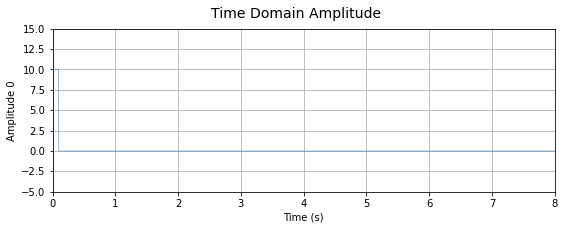

In [15]:
F0 = 10.00                       # constant force amplitude (N)
td = 0.10                       # load duration (s)
Td = 8.0                        # total integration time (s)
N  = 4096                       # number of time step for Td discretization

F  = MRPy.zeros(1, N, Td=Td)    # creates a time series filled with zeroes

i0 = int(td*F.fs)               # number of time steps to reach td
F[0, 0:i0] = F0                 # fills constant value up to td

F.plot_time(figsize=(9,3), axis_t=[0, Td, -5, 15]);


Now we use ``MRPy`` to calculate the response of a system with $m = 1$kg, natural vibration frequency
$f_{\rm n} = 1$Hz, and damping ratio of critical $\zeta = 1$%.

Maximum response amplitude:    154mm


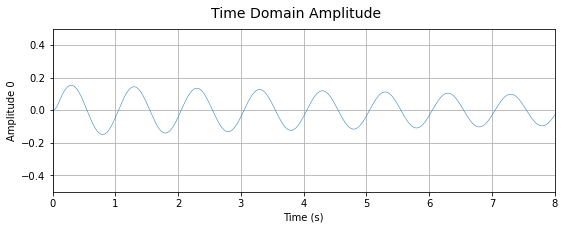

In [16]:
m  = 1.0            # system mass in kg
fn = 1.0            # natural frequency in Hz
zt = 0.01           # damping ratio to critical (nondim)

u  = F.sdof_Duhamel(fn, zt)/m 

u.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, -0.5, 0.5]);

print('Maximum response amplitude: {0:6.0f}mm'.format(1000*u.max()))


We see that ``MRPy`` has calculated the peak response amplitude as 15.4mm.
Now we will perform the same calculation by assuming that the applied force function 
can be approximated by an impulse function at time origin.

The impulse function equivalent to the load defined above is given by:

$$ F(t) = F_0 t_{\rm d} \; \delta(t) $$

where $F_0 t_{\rm d}$ is the total impulse (integral of the Dirac's delta), which
is not unitary in the example. As previously stated, the equivalent initial 
velocity, $v_0$, is approximatelly:

$$ v_0 = \frac{I}{m} = \frac{F_0 t_{\rm d}}{m} = 0.1{\rm m/s} $$

where $I$ is the given impulse. The response amplitude to this initial condition is:

$$ u_{\rm max} \approx \frac{v_0}{\omega_{\rm D}} \approx \frac{v_0}{\omega_{\rm n}} 
               \approx \frac{0.1}{2 \pi \cdot 1} \approx 15.9{\rm mm} $$

which is quite close to the numerical result (the discretization $N$ was intentionally
chosen to give the required accuracy).


### 4.2. Dynamic factor approach

As a rule of thumb, the approximation of a short transient load as an impulse function
at time origin provides a good approximation up to $t_{\rm d} \leq T_{\rm n}/4$ (where
$ T_{\rm n}$ is the system natural period of vibration). 
For instance, by setting $t_{\rm d} = 0.25$s in the previous example, the numerical
result would be $u_{\rm max} = 35.3$mm, while the impulse function approximation would give
$u_{\rm max} = 39.8$mm, overestimating the correct result (try it by yourself!).

To overcome this approximation error, numerically computed results may be provided as 
design curves, as the one reproduced below (Clough & Penzien, 1995):

<img src="images/dynamic_factors.jpg" alt="Dynamic factors" width="560px"/>  <br>

The curves provide a _dynamic amplification factor_, to be multiplied by the system 
static response to the force function maximum amplitude: 

$$ u_{\rm max} = A \frac{F_0}{k} = A \frac{F_0}{\omega_{\rm n}^2 m} $$

In the previous example, with $t_{\rm d} = 0.25$s, the dynamic amplification taken
from the respective curve (rectangular function shape) is $A \approx 1.4$. 
Hence the peak response amplitude is:

$$ u_{\rm max} = 1.4 \frac{1}{(2 \pi \cdot 1)^2 \cdot 1} \approx 35.5{\rm mm}$$

which is much closer to the correct solution.


In [17]:
k    = ((2*np.pi*fn)**2)*m
uest =  F0/k

A    =  2.0
udyn =  A*uest

print(uest, udyn)


0.25330295910584444 0.5066059182116889


## 5. Assignments <a name="section_5"></a> 

1. Utilizar o registro de vibração livre obtido no trabalho anterior.
2. Uma vez identificados frequência e amortecimento, calcular:
   (a) Máximo deslocamento para uma carga transiente de curta duração, através de          aproximação por resposta impulsiva.
   (b) Mesmo cálculo feito por ``MRPy.sdof_Duhamel()``.
3. Relatório com descrição do objeto, gráficos e resultados (nome do arquivo       T3_xxxxxxxx.ipynb).

Prazo: 20 de maio de 2020.
